In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data_train=pd.read_csv("train (1).csv")
data_train.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [6]:
data_test=pd.read_csv("test (2).csv")
data_test.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


In [10]:
data_train["Class"]

0         9
1         6
2        10
3         2
4         5
         ..
14391    10
14392     8
14393    10
14394    10
14395     4
Name: Class, Length: 14396, dtype: int64

In [11]:
data_train["Class"].unique()

array([ 9,  6, 10,  2,  5,  0,  8,  4,  3,  1,  7])

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [18]:
data_train_quantitive = data_train.select_dtypes(include=['int64','float64'])
data_train_quantitive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Popularity          14063 non-null  float64
 2   danceability        14396 non-null  float64
 3   energy              14396 non-null  float64
 4   key                 12787 non-null  float64
 5   loudness            14396 non-null  float64
 6   mode                14396 non-null  int64  
 7   speechiness         14396 non-null  float64
 8   acousticness        14396 non-null  float64
 9   instrumentalness    10855 non-null  float64
 10  liveness            14396 non-null  float64
 11  valence             14396 non-null  float64
 12  tempo               14396 non-null  float64
 13  duration_in min/ms  14396 non-null  float64
 14  time_signature      14396 non-null  int64  
 15  Class               14396 non-null  int64  
dtypes: f

In [20]:
data_train_object= data_train.select_dtypes(include='object')
data_train_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist Name  14396 non-null  object
 1   Track Name   14396 non-null  object
dtypes: object(2)
memory usage: 225.1+ KB


In [21]:
data_train_quantitive.var()

Id                    1.727160e+07
Popularity            3.034195e+02
danceability          2.739588e-02
energy                5.568065e-02
key                   1.024008e+01
loudness              1.646219e+01
mode                  2.303467e-01
speechiness           7.251645e-03
acousticness          9.667246e-02
instrumentalness      9.257760e-02
liveness              2.536303e-02
valence               5.734884e-02
tempo                 8.725224e+02
duration_in min/ms    1.247445e+10
time_signature        1.292547e-01
Class                 1.027953e+01
dtype: float64

In [23]:
data_train_quantitive=data_train_quantitive.drop(columns='Id',axis=1)

In [24]:
data_train_quantitive.isnull().sum()

Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [43]:
print(data_train_quantitive["key"].value_counts())

print("So luong missing data: ",data_train_quantitive["key"].isnull().sum())

print("Ty le so voi số lượng cột đó: ",data_train_quantitive["key"].isna().mean() * 100)

key
7.0     1650
9.0     1590
2.0     1582
1.0     1351
4.0     1252
11.0    1176
5.0     1115
6.0      963
8.0      872
10.0     825
3.0      411
Name: count, dtype: int64
So luong missing data:  1609
Ty le so voi số lượng cột đó:  11.176715754376215


In [45]:

mode_key=data_train_quantitive["key"].mode()[0]
data_train_quantitive["key"]=data_train_quantitive["key"].fillna(mode_key)

In [46]:
print(data_train_quantitive["key"].value_counts())

print("So luong missing data: ",data_train_quantitive["key"].isnull().sum())

print("Ty le so voi số lượng cột đó: ",data_train_quantitive["key"].isna().mean() * 100)

key
7.0     3259
9.0     1590
2.0     1582
1.0     1351
4.0     1252
11.0    1176
5.0     1115
6.0      963
8.0      872
10.0     825
3.0      411
Name: count, dtype: int64
So luong missing data:  0
Ty le so voi số lượng cột đó:  0.0


In [50]:

contingency = pd.crosstab(data_train['Popularity'], data_train['Class'])
chi2_stat = ((contingency - (contingency.sum(axis=1).values.reshape(-1,1) @ 
                             contingency.sum(axis=0).values.reshape(1,-1) / contingency.values.sum()))**2 /
             (contingency.sum(axis=1).values.reshape(-1,1) @ contingency.sum(axis=0).values.reshape(1,-1) / contingency.values.sum())).sum()
n = contingency.values.sum()
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency.shape)-1)))
print("Cramér's V =", cramers_v)

Cramér's V = Class
0     0.037496
1     0.034660
2     0.066423
3     0.077497
4     0.050147
5     0.038963
6     0.034247
7     0.043478
8     0.042113
9     0.081498
10    0.037397
dtype: float64


In [51]:
data_train_quantitive=data_train_quantitive.drop(columns='Popularity',axis=1)

In [52]:

contingency = pd.crosstab(data_train['key'], data_train['Class'])
chi2_stat = ((contingency - (contingency.sum(axis=1).values.reshape(-1,1) @ 
                             contingency.sum(axis=0).values.reshape(1,-1) / contingency.values.sum()))**2 /
             (contingency.sum(axis=1).values.reshape(-1,1) @ contingency.sum(axis=0).values.reshape(1,-1) / contingency.values.sum())).sum()
n = contingency.values.sum()
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency.shape)-1)))
print("Cramér's V =", cramers_v)

Cramér's V = Class
0     0.008862
1     0.009644
2     0.019860
3     0.019933
4     0.008998
5     0.036149
6     0.011245
7     0.026123
8     0.013622
9     0.017505
10    0.023594
dtype: float64


In [53]:
data_train_quantitive=data_train_quantitive.drop(columns='key',axis=1)

In [54]:

contingency = pd.crosstab(data_train['instrumentalness'], data_train['Class'])
chi2_stat = ((contingency - (contingency.sum(axis=1).values.reshape(-1,1) @ 
                             contingency.sum(axis=0).values.reshape(1,-1) / contingency.values.sum()))**2 /
             (contingency.sum(axis=1).values.reshape(-1,1) @ contingency.sum(axis=0).values.reshape(1,-1) / contingency.values.sum())).sum()
n = contingency.values.sum()
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency.shape)-1)))
print("Cramér's V =", cramers_v)

Cramér's V = Class
0     0.200437
1     0.168724
2     0.196514
3     0.193562
4     0.193568
5     0.204889
6     0.163603
7     0.201299
8     0.180749
9     0.194070
10    0.164053
dtype: float64


In [55]:
print(data_train_quantitive["instrumentalness"].value_counts())

print("So luong missing data: ",data_train_quantitive["instrumentalness"].isnull().sum())

print("Ty le so voi số lượng cột đó: ",data_train_quantitive["instrumentalness"].isna().mean() * 100)

instrumentalness
0.000109    18
0.929000    17
0.914000    16
0.899000    16
0.927000    15
            ..
0.701000     1
0.000002     1
0.000070     1
0.088400     1
0.000007     1
Name: count, Length: 3945, dtype: int64
So luong missing data:  3541
Ty le so voi số lượng cột đó:  24.597110308419005


In [58]:
median_value = data_train_quantitive['instrumentalness'].median()
data_train_quantitive['instrumentalness'].fillna(median_value)


0        0.003920
1        0.046800
2        0.635000
3        0.021300
4        0.003920
           ...   
14391    0.000390
14392    0.550000
14393    0.000004
14394    0.006620
14395    0.000024
Name: instrumentalness, Length: 14396, dtype: float64

In [61]:
data_train_quantitive.isnull().sum()

danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [105]:
skewness = data_train_quantitive['Class'].skew()
print("Skewness:", skewness)


Skewness: -0.6665628522172123


In [103]:
data_train_quantitive['loudness'].head(10)

0    0.140496
1    0.514603
2    0.320959
3   -1.553854
4    0.685928
5   -0.209628
6   -1.237080
7    1.747842
8   -0.668280
9    0.373660
Name: loudness, dtype: float64

In [80]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
data_train_quantitive['loudness_log'] = pt.fit_transform(data_train_quantitive[['loudness']])
data_train_quantitive=data_train_quantitive.drop(columns='loudness',axis=1)

In [77]:
skewness = data_train_quantitive['speechiness'].skew()
print("Skewness:", skewness)


Skewness: 3.1133953563555172


In [84]:
data_train_quantitive['speechiness_log'] = np.log1p(data_train['speechiness'])
data_train_quantitive=data_train_quantitive.drop(columns='speechiness',axis=1)

In [85]:
data_train_quantitive

,danceability,energy,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,loudness_log,speechiness_log
0,0.334,0.536,0.140496,0,0.378000,0.003920,0.1060,0.235,152.429,204947.000000,4,9,0.140496,0.037392
1,0.725,0.747,0.514603,1,0.027200,0.046800,0.1040,0.380,132.921,191956.000000,4,6,0.514603,0.083973
2,0.584,0.804,0.320959,1,0.000968,0.635000,0.2840,0.635,159.953,161037.000000,4,10,0.320959,0.060060
3,0.515,0.308,-1.553854,1,0.907000,0.021300,0.3000,0.501,172.472,298093.000000,3,2,-1.553854,0.030723
4,0.565,0.777,0.685928,0,0.183000,0.003920,0.2110,0.619,88.311,254145.000000,4,5,0.685928,0.222343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,0.607,0.946,1.728751,1,0.005480,0.000390,0.2780,0.653,120.011,195181.000000,4,10,1.728751,0.139762
14392,0.435,0.951,-0.103941,1,0.000005,0.550000,0.0952,0.203,135.034,282043.000000,4,8,-0.103941,0.056002
14393,0.415,0.941,1.024252,1,0.001810,0.000004,0.3370,0.572,167.978,176529.000000,4,10,1.024252,0.051073
14394,0.493,0.986,2.191094,1,0.000967,0.006620,0.1230,0.567,122.036,186307.000000,4,10,2.191094,0.087736


In [88]:
data_train_quantitive['acousticness_log'] = np.log1p(data_train['acousticness'])
data_train_quantitive=data_train_quantitive.drop(columns='acousticness',axis=1)

In [ ]:
instrumentalness

In [97]:
data_train_quantitive['instrumentalness_log'] = np.log1p(data_train_quantitive['instrumentalness'])
data_train_quantitive=data_train_quantitive.drop(columns='instrumentalness',axis=1)

KeyError: 'instrumentalness'

In [ ]:
liveness

In [92]:
data_train_quantitive['liveness_log'] = np.log1p(data_train_quantitive['liveness'])
data_train_quantitive=data_train_quantitive.drop(columns='liveness',axis=1)

In [ ]:
duration_in min/ms

In [99]:
data_train_quantitive['duration_in_min/ms_log'] = np.log1p(data_train_quantitive['duration_in min/ms'])
data_train_quantitive=data_train_quantitive.drop(columns='duration_in min/ms',axis=1)

In [104]:
feature_rev = data_train_quantitive['time_signature'].max() - data_train_quantitive['time_signature'] + 1

# log transform
feature_log = np.log(feature_rev)

# gán lại vào dataset
data_train_quantitive['time_signature_log'] = feature_log
data_train_quantitive=data_train_quantitive.drop(columns='time_signature',axis=1)

In [106]:
data_train_quantitive.describe()

,danceability,energy,loudness,mode,valence,tempo,Class,loudness_log,speechiness_log,acousticness_log,instrumentalness_log,liveness_log,duration_in_min/ms_log,time_signature_log
count,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000,1.085500e+04,14396.000000,14396.000000,14396.000000
mean,0.543105,0.662422,1.826207e-17,0.640247,0.486379,122.695372,6.695679,1.085853e-17,0.074417,0.193160,1.364728e-01,0.171163,10.769171,0.718688
std,0.165517,0.235967,1.000035e+00,0.479944,0.239476,29.538490,3.206170,1.000035e+00,0.071264,0.226655,2.229890e-01,0.119319,3.780886,0.145995
min,0.059600,0.001210,-3.783867e+00,0.000000,0.021500,30.557000,0.000000,-3.783866e+00,0.022251,0.000000,9.999995e-07,0.011830,0.406565,0.000000
25%,0.432000,0.508000,-6.188095e-01,0.000000,0.299000,99.799000,5.000000,-6.188096e-01,0.034208,0.004271,8.754617e-05,0.092830,12.016405,0.693147
50%,0.545000,0.699000,2.933262e-02,1.000000,0.480500,120.060000,8.000000,2.933253e-02,0.046024,0.078303,3.912337e-03,0.121332,12.249812,0.693147
75%,0.658000,0.861000,6.599431e-01,1.000000,0.672000,141.988250,10.000000,6.599431e-01,0.079827,0.359247,1.831545e-01,0.227932,12.438168,0.693147
max,0.989000,1.000000,1.051726e+01,1.000000,0.986000,217.416000,10.000000,1.051727e+01,0.670390,0.691145,6.911452e-01,0.689139,14.205651,1.609438


<Axes: >

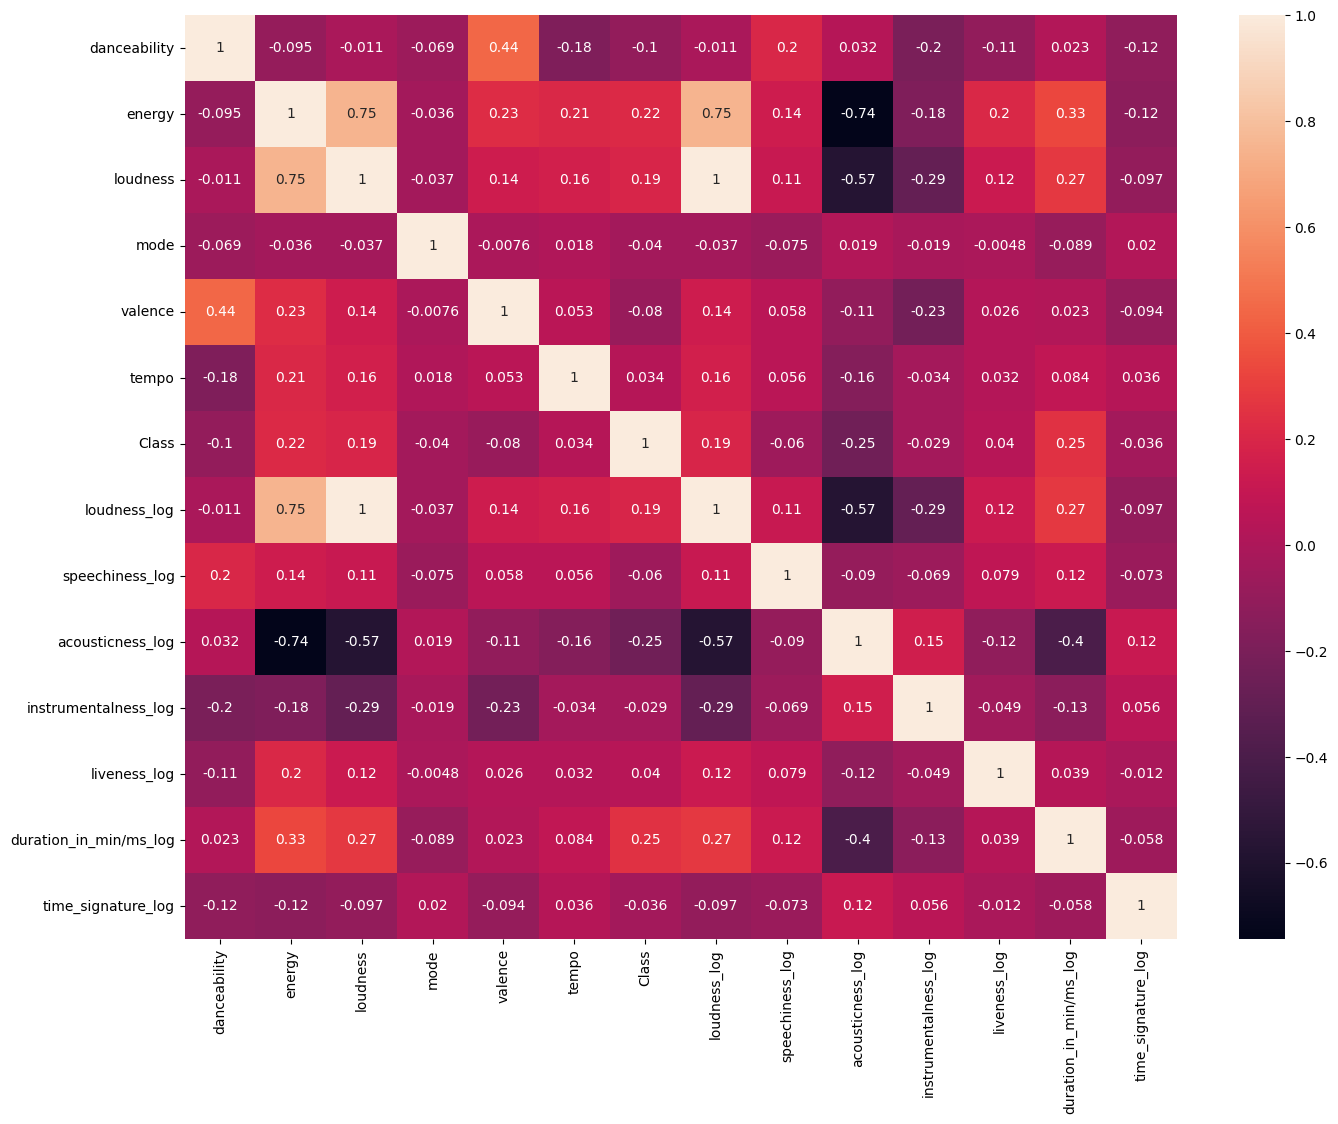

In [109]:
import seaborn as sns
corrmat= data_train_quantitive.corr()
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corrmat,annot=True)

In [110]:
data_train_object

,Artist Name,Track Name
0,Marina Maximilian,Not Afraid
1,The Black Keys,Howlin' for You
2,Royal & the Serpent,phuck u
3,Detroit Blues Band,Missing You
4,Coast Contra,My Lady
...,...,...
14391,NOISY,I Wish I Was A...
14392,BLOODSPOT,Deadline Story (feat. Patrick Boos)
14393,Cold Years,Too Far Gone
14394,The Jaded Hearts Club,Reach Out I'll Be There


In [111]:
from sklearn.preprocessing import LabelEncoder

# Label Encode Artist Name
le_artist = LabelEncoder()
data_train_object['Artist_encoded'] = le_artist.fit_transform(data_train_object['Artist Name'])

# Label Encode Track Name
le_track = LabelEncoder()
data_train_object['Track_encoded'] = le_track.fit_transform(data_train_object['Track Name'])

# Kiểm tra kết quả
print(data_train_object[['Artist Name','Artist_encoded','Track Name','Track_encoded']].head())


           Artist Name  Artist_encoded       Track Name  Track_encoded
0    Marina Maximilian            4260       Not Afraid           6755
1       The Black Keys            6558  Howlin' for You           4263
2  Royal & the Serpent            5639          phuck u          11474
3   Detroit Blues Band            1750      Missing You           6223
4         Coast Contra            1377          My Lady           6441


In [114]:
import pandas as pd

# Nối theo cột (axis=1)
data_train_final = pd.concat([data_train_object, data_train_quantitive], axis=1)

# Kiểm tra
print(data_train_final.head())


           Artist Name       Track Name  Artist_encoded  Track_encoded  \
0    Marina Maximilian       Not Afraid            4260           6755   
1       The Black Keys  Howlin' for You            6558           4263   
2  Royal & the Serpent          phuck u            5639          11474   
3   Detroit Blues Band      Missing You            1750           6223   
4         Coast Contra          My Lady            1377           6441   

   danceability  energy  loudness  mode  valence    tempo  Class  \
0         0.334   0.536  0.140496     0    0.235  152.429      9   
1         0.725   0.747  0.514603     1    0.380  132.921      6   
2         0.584   0.804  0.320959     1    0.635  159.953     10   
3         0.515   0.308 -1.553854     1    0.501  172.472      2   
4         0.565   0.777  0.685928     0    0.619   88.311      5   

   loudness_log  speechiness_log  acousticness_log  instrumentalness_log  \
0      0.140496         0.037392          0.320633                   N

In [115]:
data_train_final.head()

,Artist Name,Track Name,Artist_encoded,Track_encoded,danceability,energy,loudness,mode,valence,tempo,Class,loudness_log,speechiness_log,acousticness_log,instrumentalness_log,liveness_log,duration_in_min/ms_log,time_signature_log
0,Marina Maximilian,Not Afraid,4260,6755,0.334,0.536,0.140496,0,0.235,152.429,9,0.140496,0.037392,0.320633,NaN,0.100750,12.230512,0.693147
1,The Black Keys,Howlin' for You,6558,4263,0.725,0.747,0.514603,1,0.380,132.921,6,0.514603,0.083973,0.026837,0.045738,0.098940,12.165027,0.693147
2,Royal & the Serpent,phuck u,5639,11474,0.584,0.804,0.320959,1,0.635,159.953,10,0.320959,0.060060,0.000968,0.491643,0.249980,11.989396,0.693147
3,Detroit Blues Band,Missing You,1750,6223,0.515,0.308,-1.553854,1,0.501,172.472,2,-1.553854,0.030723,0.645531,0.021076,0.262364,12.605164,1.098612
4,Coast Contra,My Lady,1377,6441,0.565,0.777,0.685928,0,0.619,88.311,5,0.685928,0.222343,0.168054,NaN,0.191446,12.445664,0.693147


In [119]:
# Fill NaN bằng median (an toàn cho skewed numeric)
numeric_cols = ['danceability','energy','loudness','valence','tempo',
                'loudness_log','speechiness_log','acousticness_log',
                'instrumentalness_log','liveness_log','duration_in_min/ms_log',
                'time_signature_log']

for col in numeric_cols:
    data_train_final[col].fillna(data_train_final[col].median())


In [120]:
X = data_train_final.drop(columns=['Artist Name','Track Name','Class'])
y = data_train_final['Class']


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, make_scorer
import numpy as np

# Các model
models = {
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB()
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1 = make_scorer(f1_score, average='macro')

results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring=f1)
    results[name] = np.mean(scores)
    
# In kết quả F1
for name, score in results.items():
    print(f'{name}: F1-macro = {score:.4f}')


In [ ]:
# Train trên toàn bộ data
best_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_model.fit(X, y)

# Load test data
test = pd.read_csv('test (2).csv')  # thay bằng file test của bạn

# Encode Artist / Track giống train
test['Artist_encoded'] = le_artist.transform(test['Artist Name'])
test['Track_encoded'] = le_track.transform(test['Track Name'])

# Fill NaN giống train
for col in numeric_cols:
    if col in test.columns:
        test[col].fillna(data_train_final[col].median(), inplace=True)

X_test = test.drop(columns=['Artist Name','Track Name'])

# Dự đoán
y_pred = best_model.predict(X_test)

# Tạo file submission
submission = pd.DataFrame({
    'Id': test.index,
    'Class': y_pred
})

submission.to_csv('submission.csv', index=False)
print("File submission.csv đã tạo xong!")
